In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import statsmodels.formula.api as smf
import pymc as pm
import bambi as bmb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.patches as mpatches
import re
import nfl
import attila_utils

In [2]:
treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
sheet_name = 'NFL in vivo clean'
study = 'CO28152'
fpath_subjects = '../../resources/QPS/5xFAD-mouse/CO28152-animal-list.csv'
dataw_CO28152 = nfl.read_nfl_data(fpath, sheet_name, treatments_CO28152, study, fpath_subjects)
categories = ['Saline TG', 'Amiloride TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG', 'TUDCA TG', 'Saline WT', 'TUDCA WT', 'DMSO WT']
dataw_CO28152['Treatment'] = pd.Categorical(dataw_CO28152.Treatment, categories=categories, ordered=True)
dataw_CO28152

,Cohort,Group,Sex,Genotype,NF-L week 0,NF-L week 4,NF-L week 8,NF-L week 12,Treatment,Study,ΔNfl week 0,ΔNfl week 4,ΔNfl week 8,ΔNfl week 12,max_ΔNfl,Curriculum vitae,Lifespan (weeks)
IRN,,,,,,,,,,,,,,,,,
15117,I,A,f,tg/wt,576.0,861.0,757.0,687.0,Amiloride TG,CO28152,0.0,285.0,181.0,111.0,285.0,tissue sampling,46.571429
15119,I,A,f,tg/wt,698.0,1042.0,783.0,644.0,Amiloride TG,CO28152,0.0,344.0,85.0,-54.0,344.0,tissue sampling,46.000000
14627 A,I,A,f,tg/wt,701.0,1085.0,677.0,763.0,Amiloride TG,CO28152,0.0,384.0,-24.0,62.0,384.0,tissue sampling,46.428571
15161,III,A,f,tg/wt,574.0,710.0,688.0,1028.0,Amiloride TG,CO28152,0.0,136.0,114.0,454.0,454.0,tissue sampling,47.142857
15938,II,A,m,tg/wt,291.0,559.0,377.0,438.0,Amiloride TG,CO28152,0.0,268.0,86.0,147.0,268.0,tissue sampling,46.000000
16122,IV,A,m,tg/wt,535.0,609.0,532.0,545.0,Amiloride TG,CO28152,0.0,74.0,-3.0,10.0,74.0,tissue sampling,46.571429
15127,I,B,f,tg/wt,621.0,739.0,664.0,733.0,HCQ TG,CO28152,0.0,118.0,43.0,112.0,118.0,tissue sampling,46.000000
15201,IV,B,f,tg/wt,370.0,375.0,638.0,550.0,HCQ TG,CO28152,0.0,5.0,268.0,180.0,268.0,tissue sampling,46.285714
15245,V,B,f,tg/wt,678.0,593.0,688.0,577.0,HCQ TG,CO28152,0.0,-85.0,10.0,-101.0,10.0,tissue sampling,46.714286


In [3]:
treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}
fpath = '../../resources/QPS/5xFAD-mouse/CO28154-biochemistry-cleaned.xlsx'
sheet_name = 'NFL in vivo clean'
study = 'CO28154'
fpath_subjects = '../../resources/QPS/5xFAD-mouse/CO28154-animal-list.csv'
dataw_CO28154 = nfl.read_nfl_data(fpath, sheet_name, treatments_CO28154, study, fpath_subjects)
categories = ['Saline TG', 'TUDCA + HCQ TG', 'Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG', 'Saline WT', 'TUDCA + HCQ WT', 'Vehicle (Arundine) WT', 'Arundine high dose WT']
dataw_CO28154['Treatment'] = pd.Categorical(dataw_CO28154.Treatment, categories=categories, ordered=True)
dataw_CO28154

,Cohort,Group,Sex,Genotype,NF-L week 0,NF-L week 4,NF-L week 8,NF-L week 12,Treatment,Study,ΔNfl week 0,ΔNfl week 4,ΔNfl week 8,ΔNfl week 12,max_ΔNfl,Curriculum vitae,Lifespan (weeks)
IRN,,,,,,,,,,,,,,,,,
15721,II,A,f,tg/wt,585.924,473.700,937.089,735.543,Saline TG,CO28154,0.0,-112.224,351.165,149.619,351.165,Tissue sampling,45.857143
15891,V,A,f,tg/wt,737.520,899.001,971.289,725.907,Saline TG,CO28154,0.0,161.481,233.769,-11.613,233.769,Tissue sampling,47.142857
16179,VIII,A,f,tg/wt,598.353,782.016,1032.867,789.648,Saline TG,CO28154,0.0,183.663,434.514,191.295,434.514,Tissue sampling,46.714286
16524,I,A,m,tg/wt,731.694,543.927,639.027,539.493,Saline TG,CO28154,0.0,-187.767,-92.667,-192.201,-92.667,Tissue sampling,47.000000
16542,I,A,m,tg/wt,518.877,627.984,587.706,570.840,Saline TG,CO28154,0.0,109.107,68.829,51.963,109.107,Tissue sampling,46.714286
16718,II,A,m,tg/wt,777.741,594.213,504.165,575.340,Saline TG,CO28154,0.0,-183.528,-273.576,-202.401,-183.528,Tissue sampling,44.428571
16532,I,C,m,tg/wt,449.253,458.796,448.677,533.253,TUDCA + HCQ TG,CO28154,0.0,9.543,-0.576,84.000,84.000,Tissue sampling,46.571429
16540,I,C,m,tg/wt,569.031,758.778,447.492,598.212,TUDCA + HCQ TG,CO28154,0.0,189.747,-121.539,29.181,189.747,Tissue sampling,46.571429
16688,II,C,m,tg/wt,425.592,528.660,468.531,374.409,TUDCA + HCQ TG,CO28154,0.0,103.068,42.939,-51.183,103.068,Tissue sampling,45.142857


['named-figure/lineplot-tg-vs-wt-saline.png',
 'named-figure/lineplot-tg-vs-wt-saline.pdf']

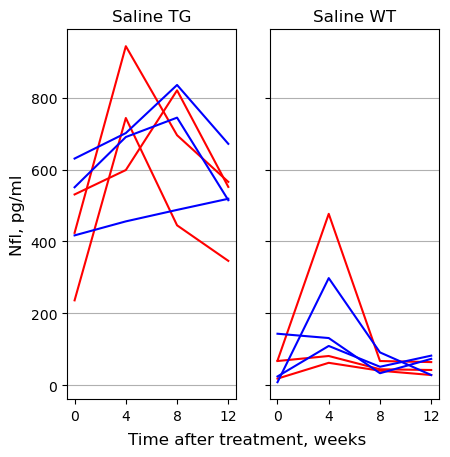

In [4]:
fig, ax = nfl.plot_dataw(dataw_CO28152, [x for x in dataw_CO28152.Treatment.cat.categories if re.match('.*Saline.*', x)])
attila_utils.savefig(fig, 'lineplot-tg-vs-wt-saline')

['named-figure/lineplot-tg-CO28152.png',
 'named-figure/lineplot-tg-CO28152.pdf']

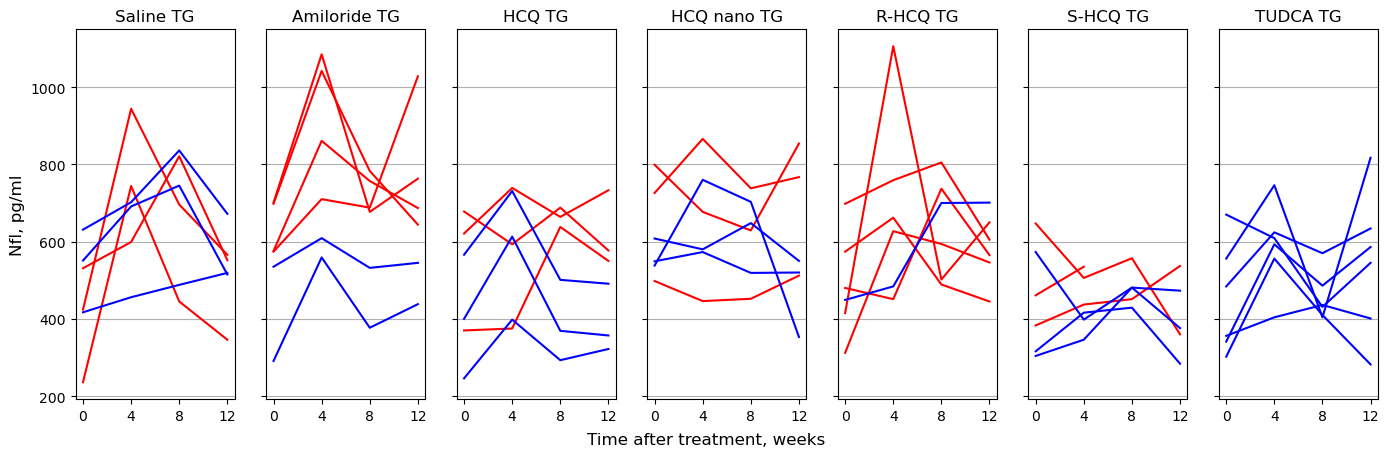

In [5]:
fig, ax = nfl.plot_dataw(dataw_CO28152, [x for x in dataw_CO28152.Treatment.cat.categories if not re.match('.* WT', x)])
attila_utils.savefig(fig, 'lineplot-tg-CO28152')

['named-figure/lineplot-HCQ-TUDCA-CO28152.png',
 'named-figure/lineplot-HCQ-TUDCA-CO28152.pdf']

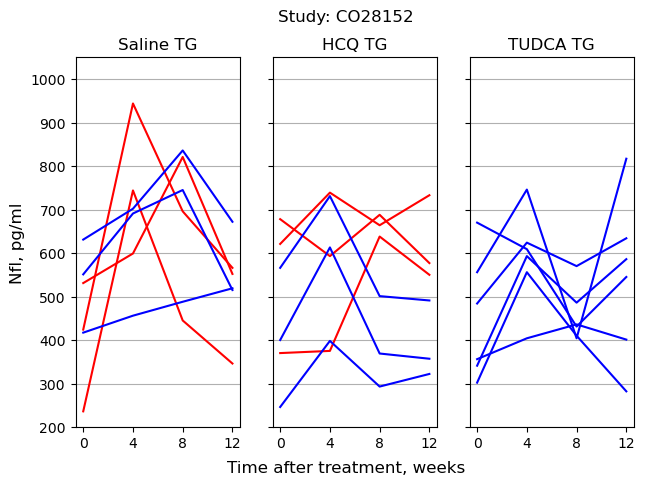

In [6]:
fig, ax = nfl.plot_dataw(dataw_CO28152, ['Saline TG', 'HCQ TG', 'TUDCA TG'])
fig.suptitle('Study: CO28152')
ax[0].set_ylim(200, 1050)
attila_utils.savefig(fig, 'lineplot-HCQ-TUDCA-CO28152')

['named-figure/lineplot-HCQ_TUDCA-CO28152.png',
 'named-figure/lineplot-HCQ_TUDCA-CO28152.pdf']

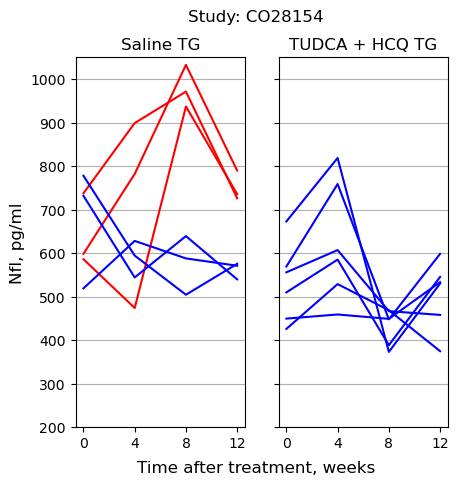

In [7]:
fig, ax = nfl.plot_dataw(dataw_CO28154, ['Saline TG', 'TUDCA + HCQ TG'])
fig.suptitle('Study: CO28154')
ax[0].set_ylim(200, 1050)
attila_utils.savefig(fig, 'lineplot-HCQ_TUDCA-CO28152')

['named-figure/lineplot-wt-CO28152.png',
 'named-figure/lineplot-wt-CO28152.pdf']

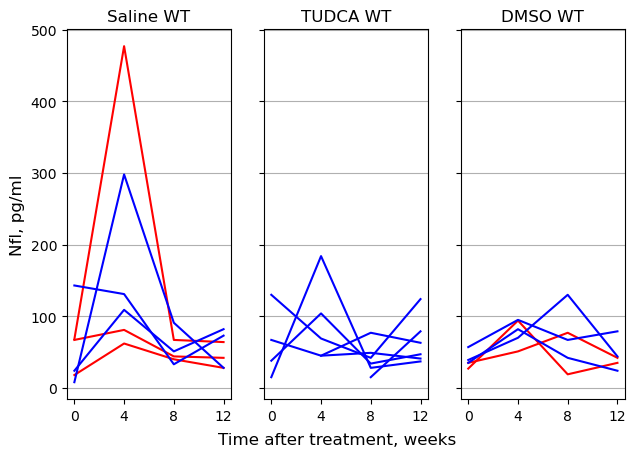

In [8]:
fig, ax = nfl.plot_dataw(dataw_CO28152, [x for x in dataw_CO28152.Treatment.cat.categories if re.match('.* WT', x)])
attila_utils.savefig(fig, 'lineplot-wt-CO28152')

['named-figure/lineplot-tg-CO28154.png',
 'named-figure/lineplot-tg-CO28154.pdf']

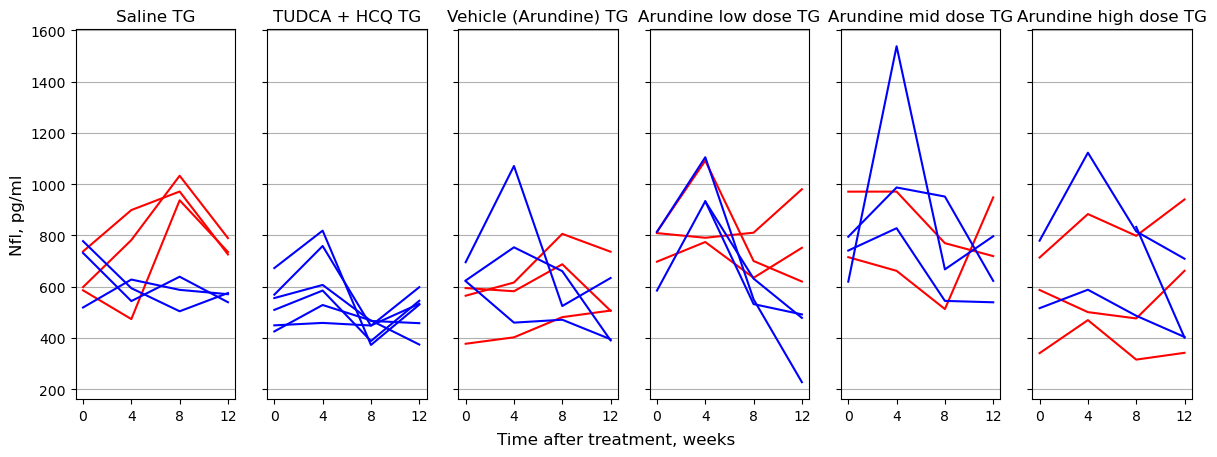

In [9]:
fig, ax = nfl.plot_dataw(dataw_CO28154, [x for x in dataw_CO28154.Treatment.cat.categories if not re.match('.* WT', x)])
attila_utils.savefig(fig, 'lineplot-tg-CO28154')

['named-figure/lineplot-TUDCA_HCQ-CO28154.png',
 'named-figure/lineplot-TUDCA_HCQ-CO28154.pdf']

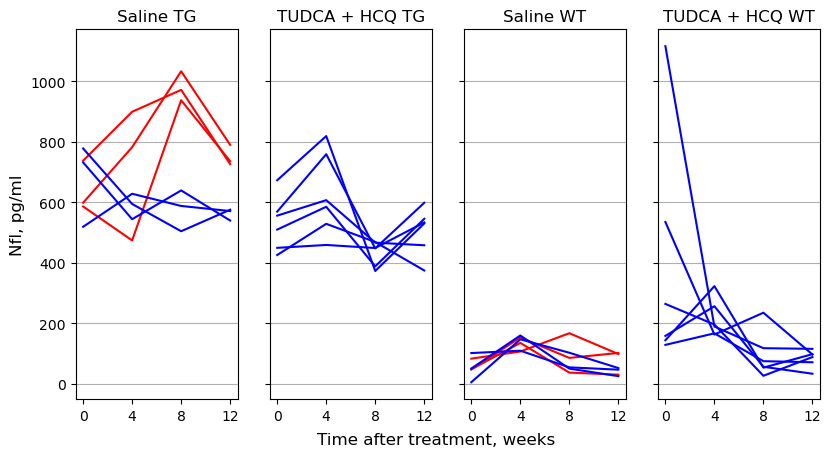

In [10]:
fig, ax = nfl.plot_dataw(dataw_CO28154, [x for x in dataw_CO28154.Treatment.cat.categories if re.match('.*(Saline|TUDCA \+ HCQ).*', x)])
attila_utils.savefig(fig, 'lineplot-TUDCA_HCQ-CO28154')

['named-figure/lineplot-wt-CO28154.png',
 'named-figure/lineplot-wt-CO28154.pdf']

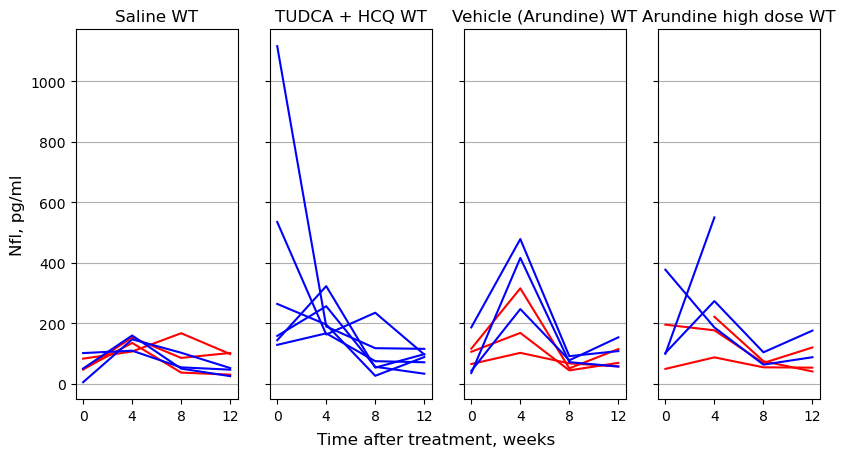

In [11]:
fig, ax = nfl.plot_dataw(dataw_CO28154, [x for x in dataw_CO28154.Treatment.cat.categories if re.match('.* WT', x)])
attila_utils.savefig(fig, 'lineplot-wt-CO28154')

## t-test

In [12]:
[nfl.my_ttest('Saline TG', 'TUDCA + HCQ TG', dataw_CO28154, var='NF-L week ' + str(i)).pvalue for i in [0, 4, 8, 12]]

[0.04579060777870203,
 0.7558973781676028,
 0.004263354637956112,
 0.019692225593779533]

['named-figure/ttest-saline-vs-TUDCA_HCQ-CO28154.png',
 'named-figure/ttest-saline-vs-TUDCA_HCQ-CO28154.pdf']

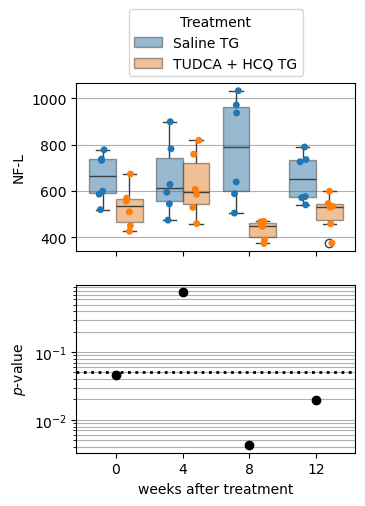

In [13]:
def ttest_plot(treatment_a='Saline TG', treatment_b='TUDCA + HCQ TG', study_a='CO28154', study_b=None, hue='Condition', return_df=False):
    study_b = study_a if study_b is None else study_b
    study2dataw = {'CO28152': dataw_CO28152, 'CO28154': dataw_CO28154}
    dataw_a, dataw_b = [study2dataw[study].copy() for study in [study_a, study_b]]
    dataw_a['Study'] = study_a
    dataw_b['Study'] = study_b
    Z = zip([treatment_a, treatment_b], [dataw_a, dataw_b])
    df = pd.concat([dataw.loc[dataw.Treatment == treatment] for treatment, dataw in Z], axis=0)
    id_vars = ['Cohort', 'Group', 'Sex', 'Genotype', 'Treatment', 'Study']
    data_vars = [x for x in df.columns if re.match('^NF-L week \d{1,2}$', x)]
    df = df[id_vars + data_vars]
    df = df.melt(id_vars=id_vars, value_name='NF-L')
    df['Week'] = df.variable.str.replace('NF-L week ', '').astype('int64')
    if treatment_a != treatment_b:
        df['Treatment'] = pd.Categorical(df.Treatment, categories=[treatment_a, treatment_b], ordered=True)
    df['Condition'] = df.apply(lambda r: r.loc['Treatment'] + ', ' + r.loc['Study'], axis=1)
    df = df.dropna()
    if return_df:
        return(df)
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(3.6, 4.8))
    sns.boxplot(data=df, x='Week', y='NF-L', hue=hue, ax=ax[0], boxprops={'alpha': 0.5})
    sns.stripplot(data=df, x='Week', y='NF-L', hue=hue, dodge=True, ax=ax[0], legend=False)
    sns.move_legend(ax[0], 'lower center', bbox_to_anchor=(0.5, 1))
    #fig.legend([mpatches.Circle((0, 0), color=c for c in ['C0', 'C1']], [treat
    ax[0].grid(axis='y', which='both')
    ax[0].set_xlabel('')
    weeks = [0, 4, 8, 12]
    pvalues = [nfl.my_ttest(treatment_a, treatment_b, dataw_a, dataw_b, var='NF-L week ' + str(i)).pvalue for i in weeks]
    ax[1].plot(np.arange(len(weeks)), pvalues, marker='o', linewidth=0, color='k')
    ax[1].set_yscale('log')
    ax[1].grid(axis='y', which='both')
    ax[1].axhline(0.05, color='k', linestyle='dotted', linewidth=2)
    ax[1].set_xlabel('weeks after treatment')
    ax[1].set_ylabel(r'$p$-value')
    return((fig, ax, pvalues))

fig, ax, pvalues = ttest_plot('Saline TG', 'TUDCA + HCQ TG', 'CO28154', hue='Treatment')
#ax[0].set_title('Study: CO28154')
attila_utils.savefig(fig, 'ttest-saline-vs-TUDCA_HCQ-CO28154')

['named-figure/ttest-CO28152-vs-CO28154-saline.png',
 'named-figure/ttest-CO28152-vs-CO28154-saline.pdf']

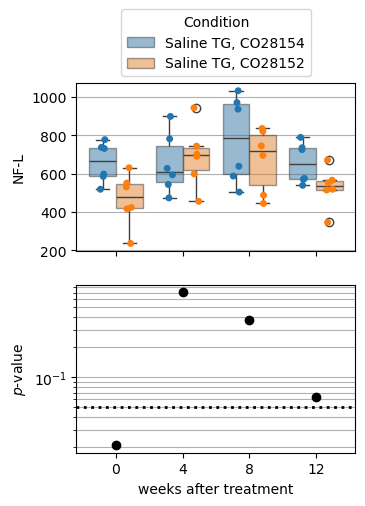

In [14]:
fig, ax, pvalues = ttest_plot('Saline TG', 'Saline TG', 'CO28154', 'CO28152', hue='Condition')
attila_utils.savefig(fig, 'ttest-CO28152-vs-CO28154-saline')

['named-figure/ttest-CO28152-saline-vs-TUDCA_HCQ-CO28154.png',
 'named-figure/ttest-CO28152-saline-vs-TUDCA_HCQ-CO28154.pdf']

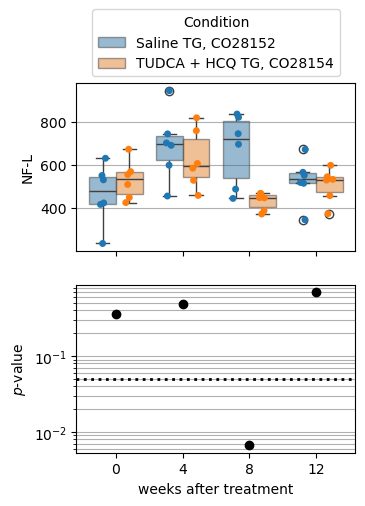

In [15]:
fig, ax, pvalues = ttest_plot('Saline TG', 'TUDCA + HCQ TG', 'CO28152', 'CO28154', hue='Condition')
attila_utils.savefig(fig, 'ttest-CO28152-saline-vs-TUDCA_HCQ-CO28154')

['named-figure/ttest-saline-vs-TUDCA-CO28152.png',
 'named-figure/ttest-saline-vs-TUDCA-CO28152.pdf']

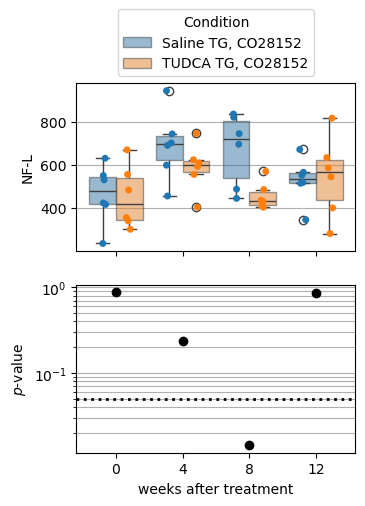

In [16]:
fig, ax, pvalues = ttest_plot('Saline TG', 'TUDCA TG', 'CO28152', hue='Condition')
attila_utils.savefig(fig, 'ttest-saline-vs-TUDCA-CO28152')

In [17]:
def ttest_array_helper(dataw, var='NF-L week 0', tg=True, reftreatment='Saline TG'):
    matchstr = '.* WT$'
    dataw = dataw.copy().dropna()
    if tg:
        treatments = [x for x in dataw.Treatment.cat.categories if not re.match(matchstr, x)]
    else:
        treatments = [x for x in dataw.Treatment.cat.categories if re.match(matchstr, x)]
    l = [nfl.my_ttest(t, reftreatment, dataw, var=var) for t in treatments]
    s = pd.Series(l, index=treatments)
    Z = zip([0, 1], ['t statistic', 'p value'])
    df = pd.concat([s.apply(lambda r: r[i]).to_frame(stat) for i, stat in Z], axis=1)
    df = pd.DataFrame(df.to_numpy(), index=df.index, columns=pd.MultiIndex.from_product([[var], df.columns]))
    return(df)

def ttest_array(dataw, tg=True, reftreatment='Saline'):
    vars = ['NF-L week ' + str(int(i)) for i in [0, 4, 8, 12]]
    l = [ttest_array_helper(dataw, var=var, tg=tg, reftreatment=reftreatment) for var in vars]
    res = pd.concat(l, axis=1)
    return(res)

dataws = [dataw_CO28152, dataw_CO28152, dataw_CO28154, dataw_CO28154]
tgs = [True, False, True, False]
reftreatments = ['Saline TG', 'DMSO WT', 'Saline TG', 'Saline WT']
Z = zip(dataws, tgs, reftreatments)
df = pd.concat([ttest_array(dataw, tg, reftreatment) for dataw, tg, reftreatment in Z], axis=0)
print(r'$\max |t|$', df.xs('t statistic', axis=1, level=1).applymap(abs).max().max())
print(r'$\min \log_{10} p$', df.xs('p value', axis=1, level=1).applymap(np.log10).min().min())
df

$\max |t|$ 3.677584496918992
$\min \log_{10} p$ -2.3702485400009006


/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/2463742371.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(r'$\max |t|$', df.xs('t statistic', axis=1, level=1).applymap(abs).max().max())
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/2463742371.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(r'$\min \log_{10} p$', df.xs('p value', axis=1, level=1).applymap(np.log10).min().min())


NF-L week 0           NF-L week 4           NF-L week 8  \
                      t statistic   p value t statistic   p value t statistic   
Saline TG                0.000000  1.000000    0.000000  1.000000    0.000000   
Amiloride TG             1.170770  0.268834    1.086689  0.302674   -0.389303   
HCQ TG                   0.171192  0.867488   -1.242073  0.242550   -1.520734   
HCQ nano TG              2.080466  0.064148   -0.433743  0.673683   -0.697530   
R-HCQ TG                 0.292794  0.775665   -0.066819  0.948043   -0.392988   
S-HCQ TG                -0.229887  0.823319   -3.505244  0.006668   -2.458469   
TUDCA TG                -0.165700  0.871695   -1.257630  0.237101   -2.951960   
Saline WT                0.695611  0.504236    1.553114  0.154814   -0.651392   
TUDCA WT                 1.058385  0.325030    0.782430  0.459607   -1.331647   
DMSO WT                  0.000000  1.000000    0.000000  1.000000    0.000000   
Saline TG                0.000000  1.000000    0.000000  1.000000    0.000000   
TUDCA + HCQ TG          -2.279937  0.045791   -0.319533  0.755897   -3.677584   
Vehicle (Arundine) TG   -1.282771  0.228506   -0.049651  0.961378   -1.609756   
Arundine low dose TG     1.370582  0.203715    2.981402  0.015414   -1.182400   
Arundine mid dose TG     1.563221  0.152438    2.276811  0.048816   -0.712649   
Arundine high dose TG   -0.844102  0.420482    0.443463  0.667900   -1.476997   
Saline WT                0.000000  1.000000    0.000000  1.000000    0.000000   
TUDCA + HCQ WT           2.116191  0.060410    2.976939  0.013880    0.304098   
Vehicle (Arundine) WT    1.343502  0.208801    2.563442  0.028206   -0.747974   
Arundine high dose WT    2.103937  0.068517    1.421353  0.193002   -0.393409   

                                NF-L week 12            
                        p value  t statistic   p value  
Saline TG              1.000000     0.000000  1.000000  
Amiloride TG           0.705214     1.667033  0.126473  
HCQ TG                 0.159296    -0.309138  0.763562  
HCQ nano TG            0.501366     0.741434  0.475482  
R-HCQ TG               0.702576     1.009044  0.336745  
S-HCQ TG               0.036250    -1.959392  0.081724  
TUDCA TG               0.014486     0.180980  0.859998  
Saline WT              0.531072     0.597321  0.565016  
TUDCA WT               0.224701     0.832072  0.432834  
DMSO WT                1.000000     0.000000  1.000000  
Saline TG              1.000000     0.000000  1.000000  
TUDCA + HCQ TG         0.004263    -2.772807  0.019692  
Vehicle (Arundine) TG  0.138529    -1.818096  0.099084  
Arundine low dose TG   0.267342    -0.338596  0.742679  
Arundine mid dose TG   0.494124     0.866593  0.408674  
Arundine high dose TG  0.173791    -0.408613  0.692375  
Saline WT              1.000000     0.000000  1.000000  
TUDCA + HCQ WT         0.767287     1.379286  0.197870  
Vehicle (Arundine) WT  0.471700     1.640582  0.131919  
Arundine high dose WT  0.704294     1.880040  0.096900

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data


['named-figure/ttest-heatmap-all-tg.png',
 'named-figure/ttest-heatmap-all-tg.pdf']

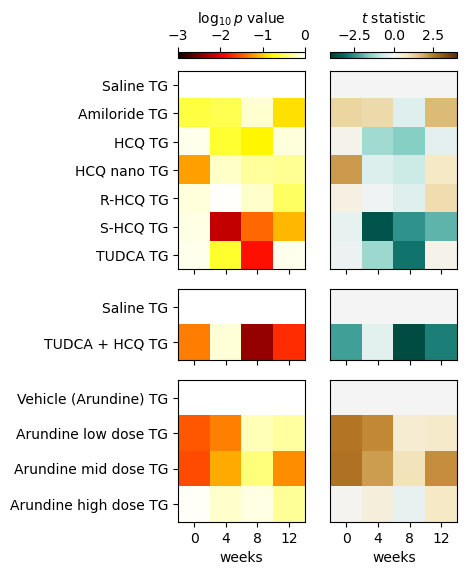

In [18]:
def ttest_heatmap(resl, hspace_denom=None):
    height_ratios = [len(df) for df in resl]
    hspace_denom = 40 if hspace_denom is None else hspace_denom
    gridspec_kw = {'hspace': sum(height_ratios) / hspace_denom}
    fig, ax = plt.subplots(len(resl), 2, figsize=(3.6, sum(height_ratios) * 0.5), height_ratios=height_ratios, squeeze=False, gridspec_kw=gridspec_kw)
    for i, res in enumerate(resl):
        axes = ax[i, :]
        do_cbar = i == 0
        axes = ttest_heatmap_axes(axes, res, do_cbar=do_cbar)
        if i < len(resl) - 1:
            for j in range(2):
                axes[j].set_xlabel('')
                axes[j].set_xticklabels('')
            #[axes[j].set_xlabel('') for j in [0, 1]]
            #[axes[j].set_xlabel('') for j in [0, 1]]
    return((fig, ax))


def ttest_heatmap_axes(axes, res, do_cbar=True):
    #fig, axes = plt.subplots(1, 2, figsize=(3.6, res.shape[0] * 0.55), sharey=True)
    for ax, pvalue in zip(axes, [True, False]):
        stat = 'p value' if pvalue else 't statistic'
        data = res.xs(stat, level=1, axis=1)
        data = data.applymap(np.log10) if pvalue else data
        vmax = 0 if pvalue else 4
        vmin = -3 if pvalue else -vmax
        cmap = 'hot' if pvalue else 'BrBG_r'
        label = r'$\log_{10} p$ value' if pvalue else r'$t$ statistic'
        cbar_kws = {'orientation': 'horizontal', 'location': 'top', 'label': label}
        axim = ax.imshow(X=data, aspect='auto', vmin=vmin, vmax=vmax, cmap=cmap)
        #axim = ax.imshow(X=data, aspect='equal', vmin=vmin, vmax=vmax, cmap=cmap)
        if do_cbar:
            plt.colorbar(mappable=axim, **cbar_kws)
        ax.set_yticks(list(range(data.shape[0])) if pvalue else [])
        if pvalue:
            ax.set_yticklabels(data.index)
        ax.set_xticks(list(range(4)))
        ax.set_xticklabels([str(int(i)) for i in [0, 4, 8, 12]], rotation=0)
        ax.set_xlabel('weeks')
    return(axes)


resl = [
    ttest_array(dataw_CO28152, tg=True, reftreatment='Saline TG'),
    ttest_array(dataw_CO28154, tg=True, reftreatment='Saline TG').loc[:'TUDCA + HCQ TG'],
    ttest_array(dataw_CO28154, tg=True, reftreatment='Vehicle (Arundine) TG').loc['Vehicle (Arundine) TG':],
]
fig, ax = ttest_heatmap(resl, hspace_denom=100)
attila_utils.savefig(fig, 'ttest-heatmap-all-tg')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data


['named-figure/ttest-heatmap-CO28152-tg.png',
 'named-figure/ttest-heatmap-CO28152-tg.pdf']

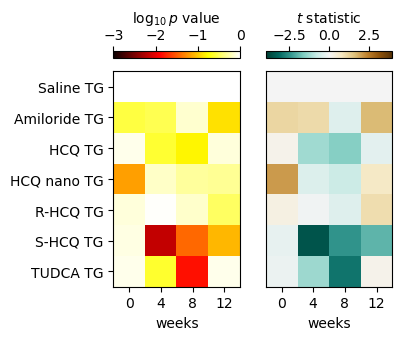

In [19]:
resl = [
    ttest_array(dataw_CO28152, tg=True, reftreatment='Saline TG'),
]
fig, ax = ttest_heatmap(resl)
attila_utils.savefig(fig, 'ttest-heatmap-CO28152-tg')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data


['named-figure/ttest-heatmap-TUDCA-HCQ-tg.png',
 'named-figure/ttest-heatmap-TUDCA-HCQ-tg.pdf']

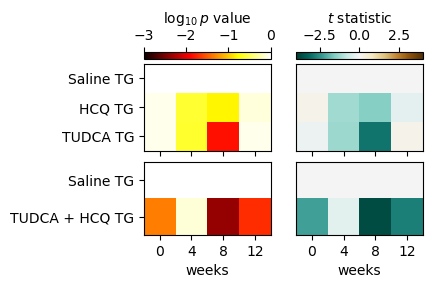

In [20]:
resl = [
    ttest_array(dataw_CO28152, tg=True, reftreatment='Saline TG').loc[['Saline TG', 'HCQ TG', 'TUDCA TG']],
    ttest_array(dataw_CO28154, tg=True, reftreatment='Saline TG').loc[:'TUDCA + HCQ TG'],
]
fig, ax = ttest_heatmap(resl, hspace_denom=40)
attila_utils.savefig(fig, 'ttest-heatmap-TUDCA-HCQ-tg')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_13118/599956900.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(np.log10) if pvalue else data


['named-figure/ttest-heatmap-all-wt.png',
 'named-figure/ttest-heatmap-all-wt.pdf']

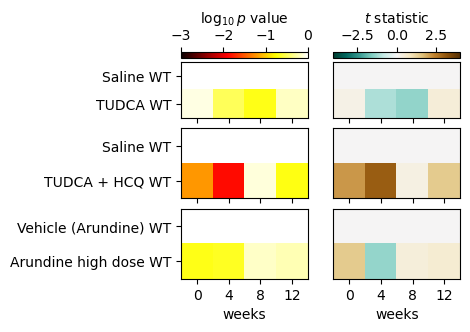

In [21]:
resl = [
    ttest_array(dataw_CO28152, tg=False, reftreatment='Saline WT').drop('DMSO WT'),
    ttest_array(dataw_CO28154, tg=False, reftreatment='Saline WT').loc[:'TUDCA + HCQ WT'],
    ttest_array(dataw_CO28154, tg=False, reftreatment='Vehicle (Arundine) WT').loc['Vehicle (Arundine) WT':],
]
fig, ax = ttest_heatmap(resl)
attila_utils.savefig(fig, 'ttest-heatmap-all-wt')

## Explanatory variables?

['named-figure/nfl_week0-vs-study-sex-cohort.png',
 'named-figure/nfl_week0-vs-study-sex-cohort.pdf']

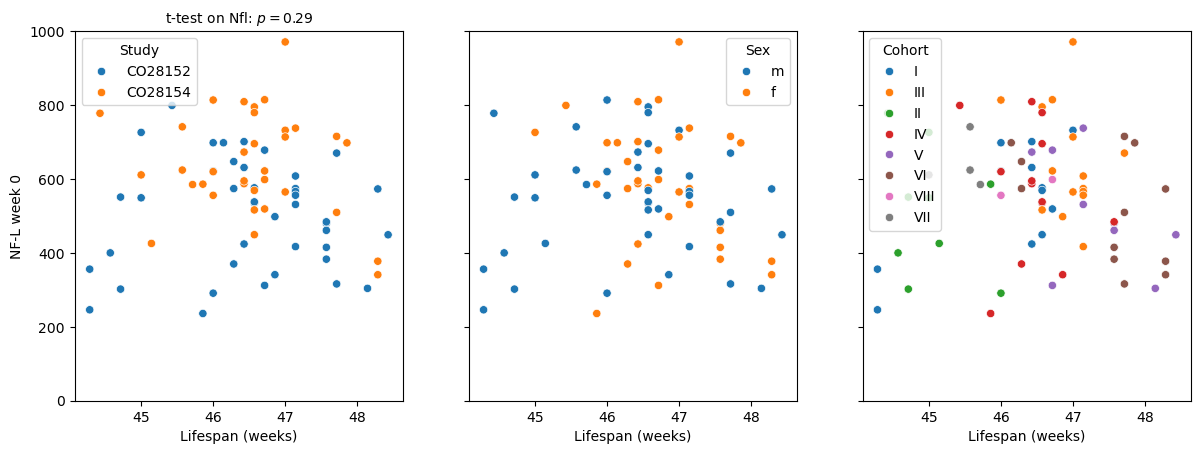

In [22]:
dataw = pd.concat([dataw_CO28152, dataw_CO28154], axis=0)
hues = ['Study', 'Sex', 'Cohort']
naxis = len(hues)
fig, ax = plt.subplots(1, naxis, figsize=(4.8 * naxis, 4.8), sharey=True)
for axi, hue in zip(ax, hues):
    sns.scatterplot(data=dataw.loc[dataw.Genotype == 'tg/wt'], y='NF-L week 0', x='Lifespan (weeks)', hue=hue, ax=axi)
    axi.set_ylim(0, 1000)

pvalue = scipy.stats.ttest_ind(*[dataw.loc[dataw.Sex == s, 'NF-L week 0'].dropna() for s in ['m', 'f']]).pvalue
ax[0].set_title(r't-test on Nfl: $p=$' + str(round(pvalue, 2)), fontsize=10)
attila_utils.savefig(fig, 'nfl_week0-vs-study-sex-cohort')

In [23]:
dataw_CO28152['Curriculum vitae'].unique()

array(['tissue sampling'], dtype=object)

In [24]:
dataw_CO28154['Curriculum vitae'].unique()

array(['Tissue sampling'], dtype=object)

## Response variable: $\max\Delta$Nfl

['named-figure/scatter-vs-max_ΔNfl-lifespan_CO28152.png',
 'named-figure/scatter-vs-max_ΔNfl-lifespan_CO28152.pdf']

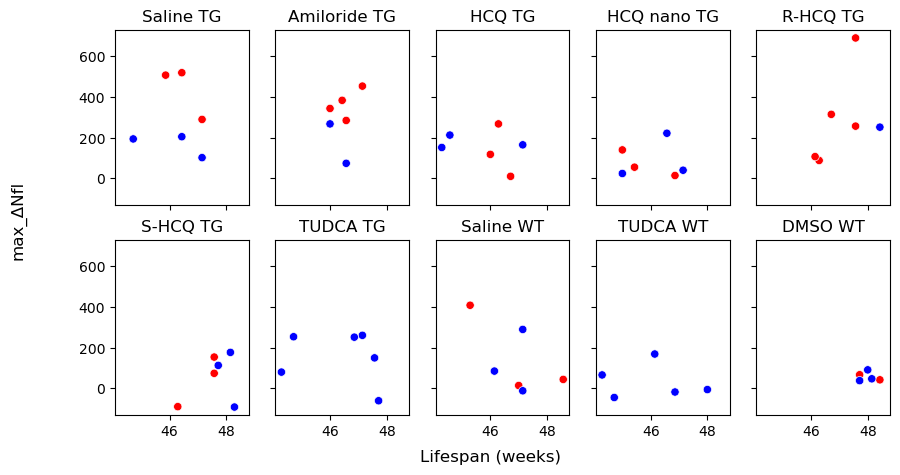

In [25]:
def my_scatter(x='Lifespan (weeks)', dataw=dataw_CO28152):
    fig, ax = plt.subplots(2, 5, figsize=(10, 5), sharey=True, sharex=True)
    for t, axi in zip(dataw.Treatment.cat.categories, ax.ravel()):
        sns.scatterplot(data=dataw.loc[dataw.Treatment == t], y='max_ΔNfl', x=x, ax=axi, hue='Sex', palette=['blue', 'red'], legend=False)
        axi.set_title(t)
        axi.set_xlabel('')
        axi.set_ylabel('')
    
    fig.supxlabel(x)
    fig.supylabel('max_ΔNfl')
    return((fig, ax))

fig, ax = my_scatter('Lifespan (weeks)', dataw_CO28152)
attila_utils.savefig(fig, 'scatter-vs-max_ΔNfl-lifespan_CO28152')

['named-figure/scatter-vs-max_ΔNfl-lifespan_CO28154.png',
 'named-figure/scatter-vs-max_ΔNfl-lifespan_CO28154.pdf']

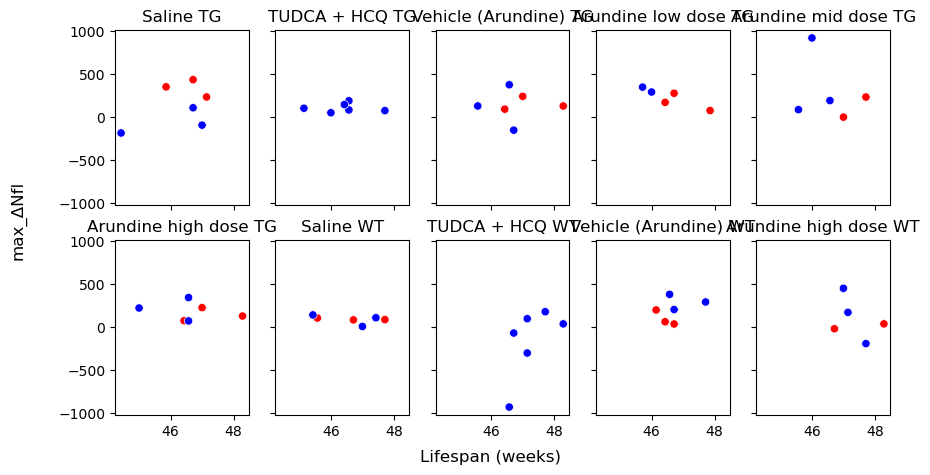

In [26]:
fig, ax = my_scatter('Lifespan (weeks)', dataw_CO28154)
attila_utils.savefig(fig, 'scatter-vs-max_ΔNfl-lifespan_CO28154')

['named-figure/scatter-max_ΔNfl-vs-Nfl-week-0_CO28152.png',
 'named-figure/scatter-max_ΔNfl-vs-Nfl-week-0_CO28152.pdf']

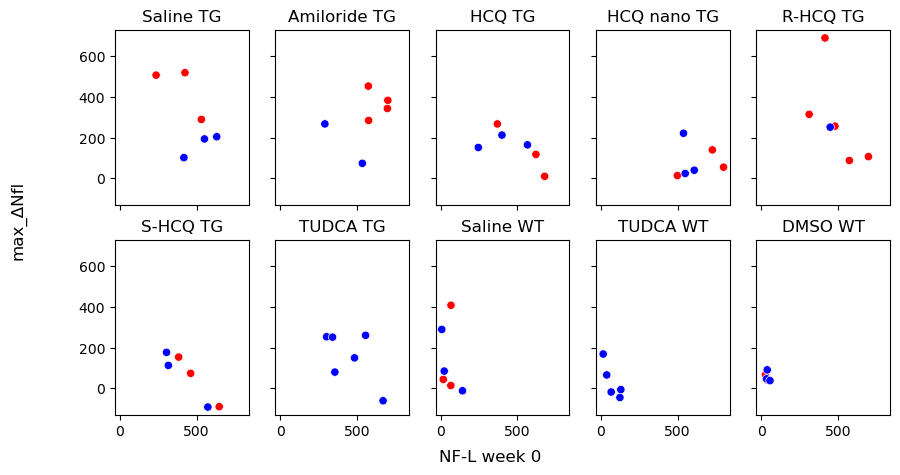

In [27]:
fig, ax = my_scatter('NF-L week 0', dataw_CO28152)
attila_utils.savefig(fig, 'scatter-max_ΔNfl-vs-Nfl-week-0_CO28152')

['named-figure/scatter-max_ΔNfl-vs-Nfl-week-0_CO28154.png',
 'named-figure/scatter-max_ΔNfl-vs-Nfl-week-0_CO28154.pdf']

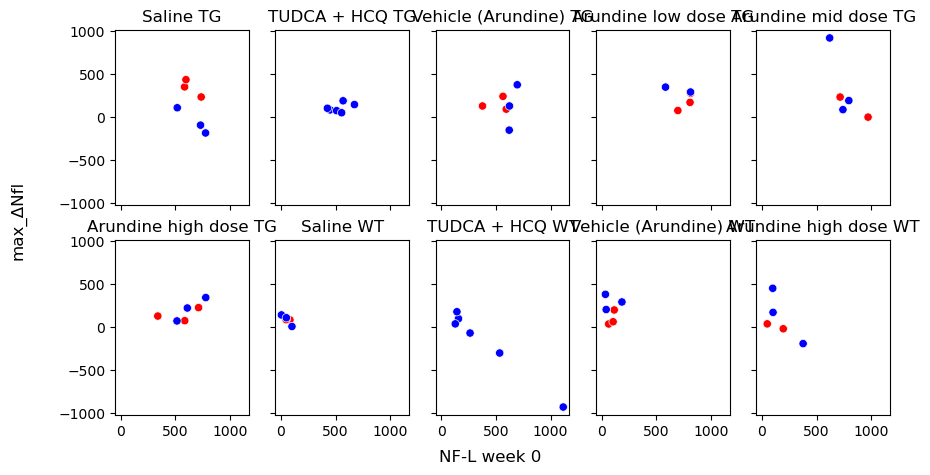

In [28]:
fig, ax = my_scatter('NF-L week 0', dataw_CO28154)
attila_utils.savefig(fig, 'scatter-max_ΔNfl-vs-Nfl-week-0_CO28154')

['named-figure/data-violinplot.png', 'named-figure/data-violinplot.pdf']

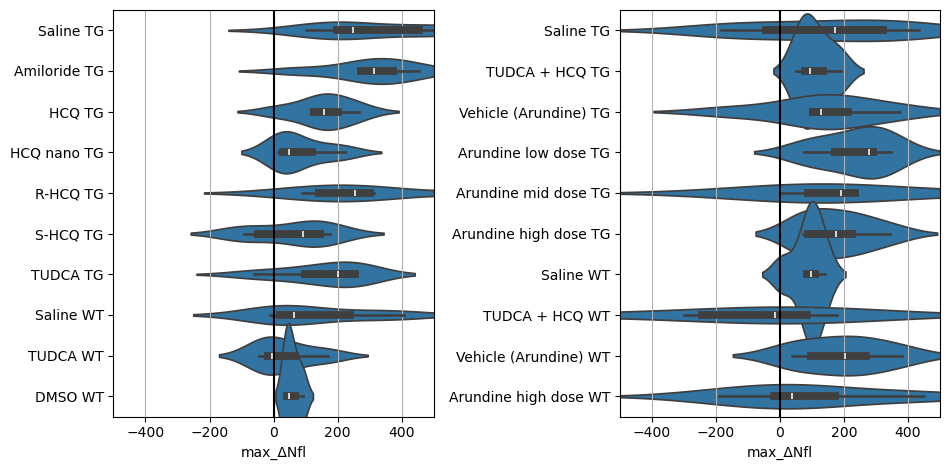

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(9.6, 4.8))
for axi, dataw in zip(ax, [dataw_CO28152, dataw_CO28154]):
    axi.grid()
    sns.violinplot(data=dataw, x='max_ΔNfl', y='Treatment', ax=axi, width=3.6)
    axi.axvline(0, color='black')
    axi.set_ylabel('')
    axi.set_xlim(-500, 500)

plt.tight_layout()
attila_utils.savefig(fig, 'data-violinplot')

In [30]:
def subset_data(sel_treatments=['Saline TG', 'Saline WT', 'Amiloride TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG', 'TUDCA TG'], dataw=dataw_CO28152):
    data = dataw.loc[dataw.Treatment.isin(sel_treatments)].copy()
    data['Treatment'] = pd.Categorical(data.Treatment, categories=sel_treatments, ordered=True)
    return(data)

## Bayesian analysis

In [31]:
def fit_bayes(sel_treatments, dataw=dataw_CO28152):
    dataw = dataw.dropna(subset='max_ΔNfl')
    model = bmb.Model('max_ΔNfl ~ 1 + Treatment', subset_data(sel_treatments=sel_treatments, dataw=dataw))
    results = model.fit()
    return(results)

sel_treatments_CO28152=['Saline TG', 'Saline WT', 'Amiloride TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG', 'TUDCA TG']
sel_treatments_CO28154a=['Saline TG', 'Saline WT', 'TUDCA + HCQ TG', 'TUDCA + HCQ WT']
sel_treatments_CO28154b=['Vehicle (Arundine) TG', 'Vehicle (Arundine) WT', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG', 'Arundine high dose WT']
l_sel_treatments = [sel_treatments_CO28152, sel_treatments_CO28154a, sel_treatments_CO28154b]
l_dataw = [dataw_CO28152, dataw_CO28154, dataw_CO28154]
results_CO28152, results_CO28154a, results_CO28154b = [fit_bayes(st, dw) for st, dw in zip(l_sel_treatments, l_dataw)]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [max_ΔNfl_sigma, Intercept, Treatment]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [max_ΔNfl_sigma, Intercept, Treatment]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [max_ΔNfl_sigma, Intercept, Treatment]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


In [32]:
az.summary(results_CO28152)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,302.403,60.645,186.906,413.753,1.514,1.088,1597.0,2108.0,1.0
Treatment[Saline WT],-163.681,85.313,-320.801,0.375,1.731,1.233,2427.0,3058.0,1.0
Treatment[Amiloride TG],-0.329,86.224,-163.948,159.399,1.749,1.237,2428.0,2709.0,1.0
Treatment[HCQ TG],-147.324,86.203,-306.991,16.776,1.809,1.280,2294.0,2722.0,1.0
Treatment[HCQ nano TG],-219.447,85.441,-376.662,-59.576,1.802,1.355,2244.0,3086.0,1.0
Treatment[R-HCQ TG],-18.101,86.336,-178.116,140.929,1.822,1.289,2256.0,2926.0,1.0
Treatment[S-HCQ TG],-245.793,85.310,-408.895,-87.655,1.813,1.282,2219.0,2506.0,1.0
Treatment[TUDCA TG],-146.710,86.365,-315.006,9.623,1.920,1.358,2023.0,2669.0,1.0
max_ΔNfl_sigma,148.533,16.693,118.864,179.777,0.307,0.217,2945.0,3089.0,1.0


In [33]:
az.summary(results_CO28154a)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,141.392,100.411,-44.540,328.336,2.021,1.572,2473.0,2201.0,1.0
Treatment[Saline WT],-50.707,143.309,-308.826,228.193,2.721,2.132,2771.0,2802.0,1.0
Treatment[TUDCA + HCQ TG],-33.046,142.610,-306.566,233.292,2.660,2.119,2902.0,2863.0,1.0
Treatment[TUDCA + HCQ WT],-302.565,143.477,-577.950,-34.870,2.664,1.922,2906.0,2560.0,1.0
max_ΔNfl_sigma,250.214,41.401,177.073,325.228,0.760,0.546,3106.0,2875.0,1.0


In [34]:
az.summary(results_CO28154b)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,139.211,86.006,-19.172,307.562,1.723,1.226,2482.0,2517.0,1.0
Treatment[Vehicle (Arundine) WT],55.238,119.731,-165.445,279.876,2.265,1.643,2758.0,2866.0,1.0
Treatment[Arundine low dose TG],94.859,124.638,-139.148,321.744,2.180,1.556,3260.0,3360.0,1.0
Treatment[Arundine mid dose TG],147.679,125.182,-90.110,379.470,2.286,1.714,2980.0,3204.0,1.0
Treatment[Arundine high dose TG],38.875,119.264,-184.767,265.425,2.169,1.602,3018.0,3140.0,1.0
Treatment[Arundine high dose WT],-49.913,126.943,-294.377,189.430,2.387,1.759,2834.0,2803.0,1.0
max_ΔNfl_sigma,207.443,28.208,158.647,261.833,0.519,0.367,2943.0,2963.0,1.0


['named-figure/violinplot-CO28152.png', 'named-figure/violinplot-CO28152.pdf']

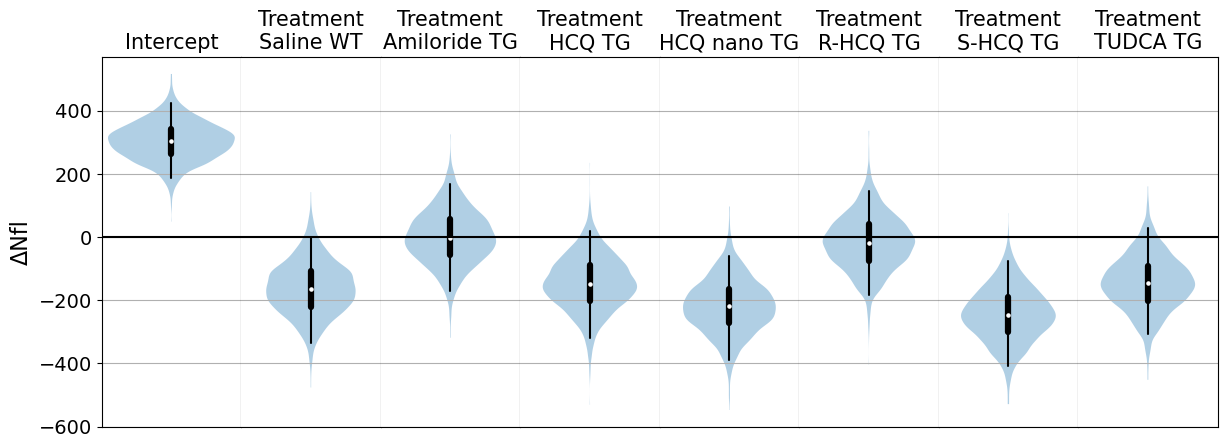

In [35]:
def my_violin(results):
    nvars = results.posterior.variables['Treatment'].shape[2] + 1
    ax = az.plot_violin(results, hdi_prob=0.95, var_names=['Intercept', 'Treatment'], grid=(1, nvars), figsize=(14.4, 4.8))
    for axi in ax:
        axi.axhline(0, color='black')
        axi.grid()
    ax[0].set_ylabel('ΔNfl', fontsize=16)
    fig = ax[0].get_figure()
    return((fig, ax))

fig, ax = my_violin(results_CO28152)
attila_utils.savefig(fig, 'violinplot-CO28152')

['named-figure/violinplot-CO28154a.png',
 'named-figure/violinplot-CO28154a.pdf']

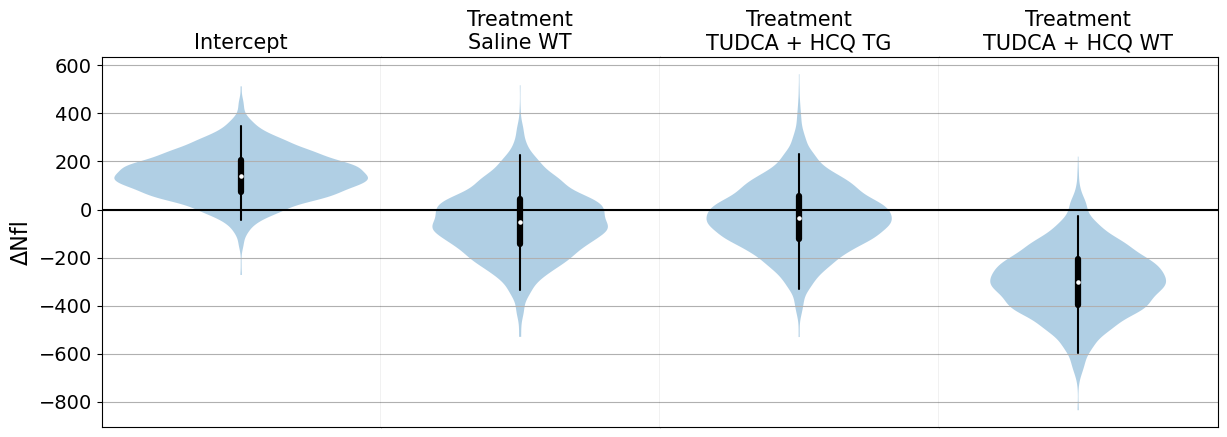

In [36]:
fig, ax = my_violin(results_CO28154a)
attila_utils.savefig(fig, 'violinplot-CO28154a')

['named-figure/violinplot-CO28154b.png',
 'named-figure/violinplot-CO28154b.pdf']

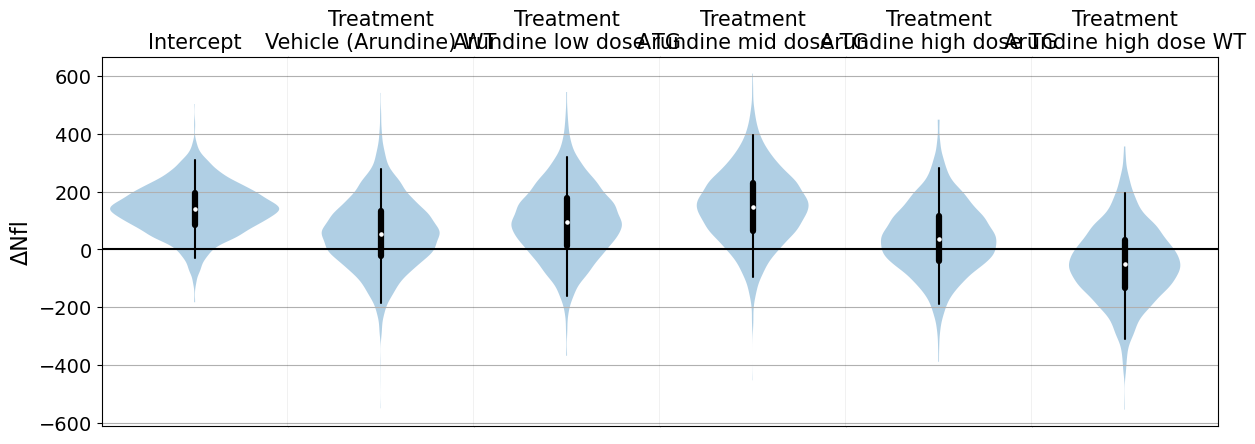

In [37]:
fig, ax = my_violin(results_CO28154b)
attila_utils.savefig(fig, 'violinplot-CO28154b')

['named-figure/forestplot-CO28152.png', 'named-figure/forestplot-CO28152.pdf']

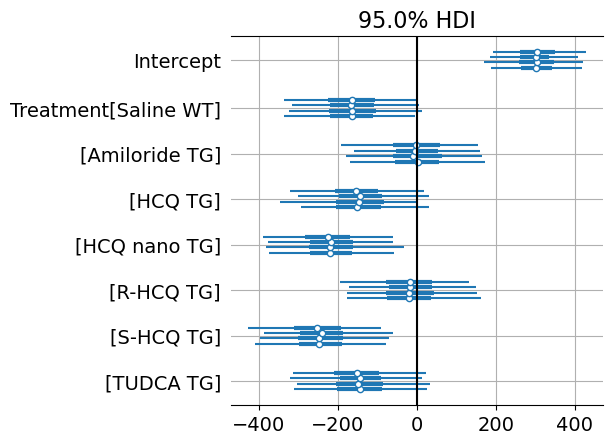

In [38]:
def my_forest(results, var_names='~max_ΔNfl_sigma'):
    fig, ax = plt.subplots(figsize=(4.8, 4.8))
    az.plot_forest(results, ax=ax, hdi_prob=0.95, var_names=var_names)
    ax.grid()
    ax.axvline(0, color='black')
    return((fig, ax))

fig, ax = my_forest(results_CO28152)
attila_utils.savefig(fig, 'forestplot-CO28152')

['named-figure/forestplot-CO28154a.png',
 'named-figure/forestplot-CO28154a.pdf']

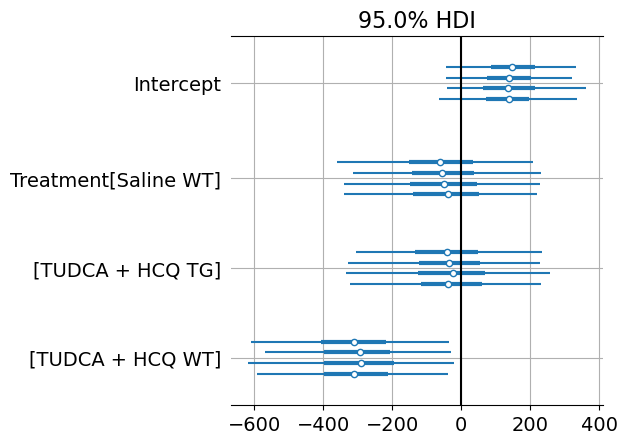

In [39]:
fig, ax = my_forest(results_CO28154a)
attila_utils.savefig(fig, 'forestplot-CO28154a')

['named-figure/forestplot-CO28154b.png',
 'named-figure/forestplot-CO28154b.pdf']

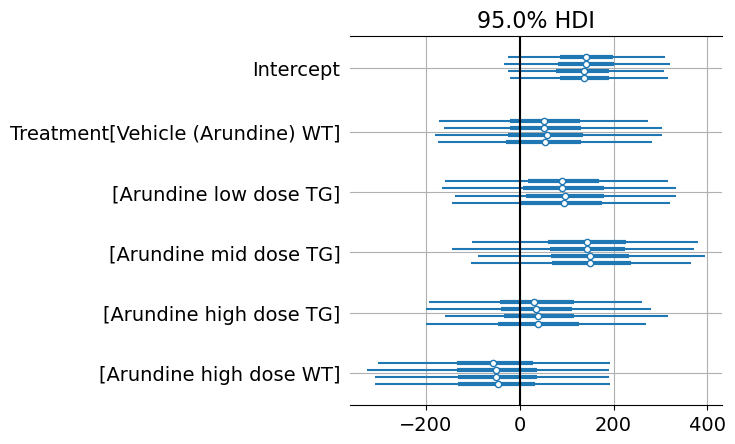

In [40]:
fig, ax = my_forest(results_CO28154b)
attila_utils.savefig(fig, 'forestplot-CO28154b')

## Frequentist analysis

In [41]:
def fit2resultsd(dataw=dataw_CO28152, sel_treatments=sel_treatments_CO28152):
    resultsd = {}
    resultsd['any duration'] = smf.ols('max_ΔNfl ~ 1 + Treatment', data=subset_data(sel_treatments=sel_treatments, dataw=dataw)).fit()
    resultsd['any duration'].summary()
    return(resultsd)

sel_treatments_CO28152 = ['Saline TG', 'Saline WT', 'Amiloride TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG', 'TUDCA TG']
sel_treatments_CO28154_TUDCA_HCQ = ['Saline TG', 'TUDCA + HCQ TG']
sel_treatments_CO28154_Arundine = ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG']

Z = zip([dataw_CO28152, dataw_CO28154, dataw_CO28154], [sel_treatments_CO28152, sel_treatments_CO28154_TUDCA_HCQ, sel_treatments_CO28154_Arundine])
resultd_CO28152, resultd_CO28154_TUDCA_HCQ, resultd_CO28154_Arundine = [fit2resultsd(dataw, sel_treatments) for dataw, sel_treatments in Z]

for k, v in resultd_CO28152.items():
    print(k)
    print(v.summary(), *list(np.repeat(['\n'], 3)))

any duration
                            OLS Regression Results                            
Dep. Variable:               max_ΔNfl   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.781
Date:                Wed, 10 Jul 2024   Prob (F-statistic):             0.0187
Time:                        11:14:25   Log-Likelihood:                -302.76
No. Observations:                  48   AIC:                             621.5
Df Residuals:                      40   BIC:                             636.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept

/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


In [42]:
for k, v in resultd_CO28154_TUDCA_HCQ.items():
    print(k)
    print(v.summary(), *list(np.repeat(['\n'], 3)))

any duration
                            OLS Regression Results                            
Dep. Variable:               max_ΔNfl   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.1098
Date:                Wed, 10 Jul 2024   Prob (F-statistic):              0.747
Time:                        11:14:25   Log-Likelihood:                -78.039
No. Observations:                  12   AIC:                             160.1
Df Residuals:                      10   BIC:                             161.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inter

/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


In [43]:
for k, v in resultd_CO28154_Arundine.items():
    print(k)
    print(v.summary(), *list(np.repeat(['\n'], 3)))

any duration
                            OLS Regression Results                            
Dep. Variable:               max_ΔNfl   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.5296
Date:                Wed, 10 Jul 2024   Prob (F-statistic):              0.668
Time:                        11:14:25   Log-Likelihood:                -146.57
No. Observations:                  22   AIC:                             301.1
Df Residuals:                      18   BIC:                             305.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [44]:
Z = zip([resultd_CO28152, resultd_CO28154_TUDCA_HCQ, resultd_CO28154_Arundine],
        ['Saline TG', 'Saline TG', 'Vehicle (Arundine) TG'],
        ['CO28152', 'CO28154', 'CO28154'])

#results2df(resultd_CO28154_TUDCA_HCQ, ref_treatment='Saline TG', study='CO28154')
l = [nfl.results2df(d, r, s) for d, r, s in Z]
resultsdf_CO28152, resultsdf_CO28154_TUDCA_HCQ, resultsdf_CO28154_Arundine = l
resultsdf_all = pd.concat(l)
resultsdf_all.to_csv('../../results/2024-05-20-nfl-modeling/results.csv')
resultsdf_all

mean         bse      pval  \
duration     treatment                                                 
any duration Intercept              303.166667   59.379307  0.000008   
             Saline WT             -164.833333   83.975021   0.05664   
             Amiloride TG            -1.666667   83.975021  0.984264   
             HCQ TG                -148.833333   83.975021  0.083953   
             HCQ nano TG           -220.666667   83.975021  0.012129   
             R-HCQ TG               -18.166667   83.975021  0.829827   
             S-HCQ TG              -247.166667   83.975021  0.005383   
             TUDCA TG              -147.166667   83.975021   0.08735   
             Intercept                  142.06    72.21142  0.077494   
             TUDCA + HCQ TG            -33.834  102.122369   0.74725   
             Intercept                 136.337   85.424658  0.127898   
             Arundine low dose TG      96.6622  126.705244  0.455411   
             Arundine mid dose TG     149.9044  126.705244  0.252163   
             Arundine high dose TG     41.6165   120.80871  0.734475   

                                                treatment  \
duration     treatment                                      
any duration Intercept                          Intercept   
             Saline WT                          Saline WT   
             Amiloride TG                    Amiloride TG   
             HCQ TG                                HCQ TG   
             HCQ nano TG                      HCQ nano TG   
             R-HCQ TG                            R-HCQ TG   
             S-HCQ TG                            S-HCQ TG   
             TUDCA TG                            TUDCA TG   
             Intercept                          Intercept   
             TUDCA + HCQ TG                TUDCA + HCQ TG   
             Intercept                          Intercept   
             Arundine low dose TG    Arundine low dose TG   
             Arundine mid dose TG    Arundine mid dose TG   
             Arundine high dose TG  Arundine high dose TG   

                                      reference treatment    study  \
duration     treatment                                               
any duration Intercept                          Saline TG  CO28152   
             Saline WT                          Saline TG  CO28152   
             Amiloride TG                       Saline TG  CO28152   
             HCQ TG                             Saline TG  CO28152   
             HCQ nano TG                        Saline TG  CO28152   
             R-HCQ TG                           Saline TG  CO28152   
             S-HCQ TG                           Saline TG  CO28152   
             TUDCA TG                           Saline TG  CO28152   
             Intercept                          Saline TG  CO28154   
             TUDCA + HCQ TG                     Saline TG  CO28154   
             Intercept              Vehicle (Arundine) TG  CO28154   
             Arundine low dose TG   Vehicle (Arundine) TG  CO28154   
             Arundine mid dose TG   Vehicle (Arundine) TG  CO28154   
             Arundine high dose TG  Vehicle (Arundine) TG  CO28154   

                                        duration  
duration     treatment                            
any duration Intercept              any duration  
             Saline WT              any duration  
             Amiloride TG           any duration  
             HCQ TG                 any duration  
             HCQ nano TG            any duration  
             R-HCQ TG               any duration  
             S-HCQ TG               any duration  
             TUDCA TG               any duration  
             Intercept              any duration  
             TUDCA + HCQ TG         any duration  
             Intercept              any duration  
             Arundine low dose TG   any duration  
             Arundine mid dose TG   any duration  
             Arundine high

['named-figure/fx-size-p-val-all.png', 'named-figure/fx-size-p-val-all.pdf']

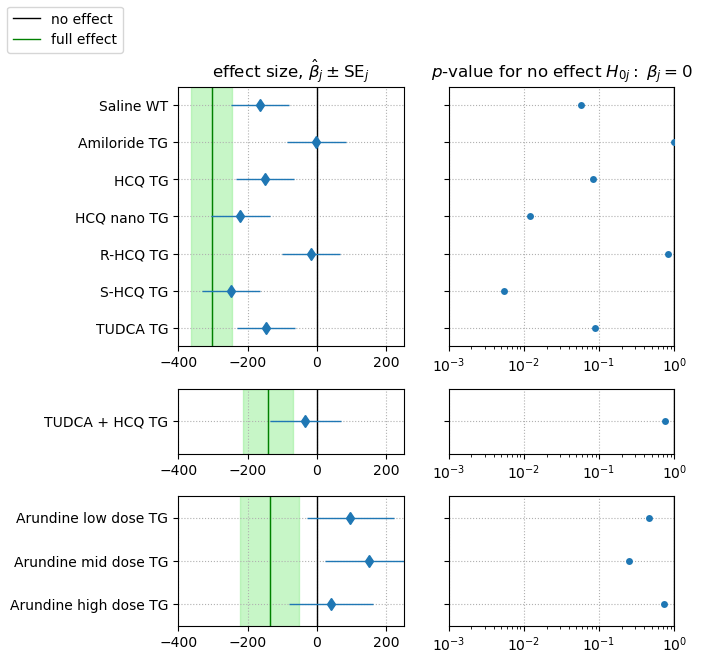

In [45]:
l_resultsdf = [resultsdf_CO28152, resultsdf_CO28154_TUDCA_HCQ, resultsdf_CO28154_Arundine]
fig, ax = nfl.result_plotter(l_resultsdf, duration='any duration', hspace_denom=50, x0_lim=(-400, 250), x1_lim=(1e-3, 1))
attila_utils.savefig(fig, 'fx-size-p-val-all')

['named-figure/fx-size-p-val-TUDCA-HCQ.png',
 'named-figure/fx-size-p-val-TUDCA-HCQ.pdf']

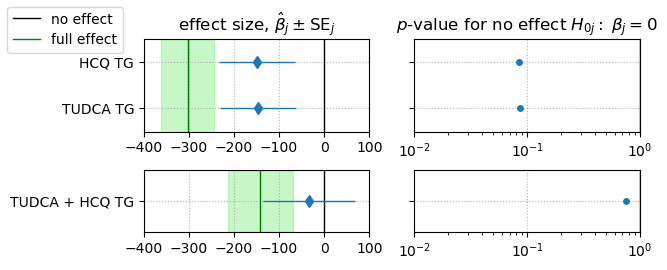

In [46]:
l_resultsdf = [resultsdf_CO28152.loc[resultsdf_CO28152.treatment.isin(['Intercept', 'HCQ TG', 'TUDCA TG'])], resultsdf_CO28154_TUDCA_HCQ]
fig, ax = nfl.result_plotter(l_resultsdf, duration='any duration', hspace_denom=10, x0_lim=(-400, 100), x1_lim=(1e-2, 1))
attila_utils.savefig(fig, 'fx-size-p-val-TUDCA-HCQ')

In [47]:
%connect_info

{
  "shell_port": 52469,
  "iopub_port": 52470,
  "stdin_port": 52471,
  "control_port": 52473,
  "hb_port": 52472,
  "ip": "127.0.0.1",
  "key": "e8639dc6-540df7236a5848b68fd27188",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-05-20-nfl-modeling/2024-05-20-nfl-modeling.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-4f6ac74d-3cc5-4c3a-8750-4c836fc0cf41.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
